# Overview of software tools

This notebook is a brief overview of some key concepts in the Python-based software ecosystem used in this course.

#### Table of contents

- Jupyter notebook
- Libraries
- Plotting
- Pandas DataFrame manipulation
- Randomness and reproducibility
- Vectorization and list comprehensions


## Jupyter notebook

According to the [Jupyter website](http://jupyter.org/): "The Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and narrative text. Uses include: data cleaning and transformation, numerical simulation, statistical modeling, data visualization, machine learning, and much more."

Jupyter is the interface we will be using in this course. It is web-based, meaning that the interface appears in a tab on your web browser. Depending on how things are configured, the computations may be done on your local machine, or in the cloud.

A Jupyter notebook consists of a series of cells. Each cell may contain Python code or [markdown](https://en.wikipedia.org/wiki/Markdown)-formatted text. Below a code cell, the results of running the code will appear (this may consist of graphical or text output).

Across the top of the Jupyter notebook is a series of menus.

You can enter code or text into a cell simply by clicking on the cell and typing. Just below the main menu bar is a drop-down selector that lets you specify whether a given cell contains code or text (Markdown). The code cells will be executed by the Python interpreter, so should only contain valid Python code. The markdown cells will not be executed. If you do not know markdown that isn't a problem at this point, you can simply enter plain text into the markdown cells.

To run code in a single cell, you can click on the `run` button, or press control + enter. The `Cell` menu contains an important item labeled "Run All" that allows you to run all the cells in the notebook in sequence. The 'Kernel' menu is also quite useful. If you find that your code is stuck running (maybe you inadvertently wrote an infinite loop), you can go to 'Kernel' -> 'Interrupt' to force the interpreter to quit.

A few useful keyboard shortcuts:

- Run cell, select below: shift + enter
- Run cell: ctrl + enter
- Run cell, insert below: option + enter

By pressing the 'esc' key, you enter command mode (the colored border around the currently selected cell should change from green to blue). Once in command mode, you can use these shortcuts:

- Insert cell above: a
- Insert cell below: b
- Copy cell: c
- Paste cell: v
- Delete selected cell(s): d d
- Change selected cell to markdown: m
- Change selected cell to code: y

To exit command mode, click anywhere in a cell or press enter.

Jupyter will autosave your work periodically, but if you want to force an immediate save of your notebook:

- Save file: command + s

Jupyter notebooks are easy to use and powerful. However it is important to note that when you run cells in an arbitrary order, you may get non-reproducible results. It is good to confirm that your notebook runs correctly from top to bottom (using the Cell/Run All menu item). This ensures that you are not relying on manually running the cells out of order to obtain your findings.


## Libraries

There are a few libraries that you will use in almost every section of this course:

- [Numpy](https://numpy.org/)
- [Pandas](https://pandas.pydata.org/)
- [Matplotlib](https://matplotlib.org/)
- [Seaborn](https://seaborn.pydata.org/)

The key points to remember are how to import these libraries and their standard import names, as well as their main uses.

Numpy (from the [Numpy website](http://www.numpy.org/)):  
_NumPy is the fundamental package for scientific computing with Python. It contains among other things:_

- a powerful N-dimensional array object
- sophisticated (broadcasting) functions
- tools for integrating C/C++ and Fortran code
- useful linear algebra, Fourier transform, and random number capabilities

Pandas (from the [Pandas website](https://pandas.pydata.org/)):  
_high-performance, easy-to-use data structures and data analysis tools for the Python programming language_

Both the Matplotlib and Seaborn libraries are for creating graphs.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Plotting


Here we provide a few simple examples of statistical plots. In many cases, you will have the option to make a plot using matplotlib, or seaborn. You can think of Seaborn as a more abstract layer that sits on top of matplotlib.

To illustrate, we load a small dataset into a Pandas dataframe. The dataset contains data on the US dollar amount of restaurant bills and tips at restaurants.


In [2]:
tips_data = sns.load_dataset("tips")

### Plot a histogram of the tips

Here we make histograms of the tip amounts using Seaborn and Matplotlib.


c:\Users\dongh\anaconda3\envs\py3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


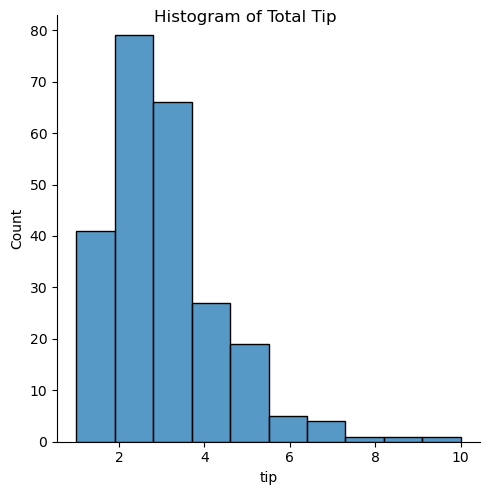

In [7]:
# with seaborn
g = sns.displot(tips_data["tip"], kde=False, bins=10)
g.fig.suptitle("Histogram of Total Tip")
plt.show()

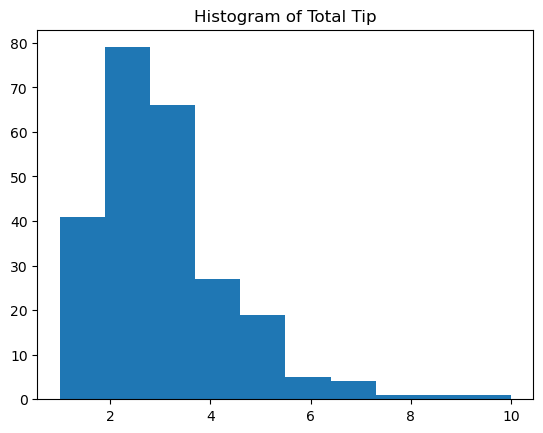

In [8]:
# with matplotlib
plt.hist(tips_data["tip"], bins=10)
plt.title("Histogram of Total Tip")
plt.show()

### Create a boxplot of the total bill amounts


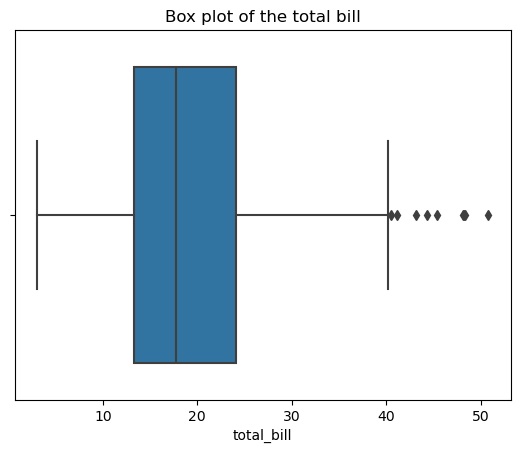

In [9]:
# with seaborn
sns.boxplot(x=tips_data["total_bill"]).set_title("Box plot of the total bill")
plt.show()

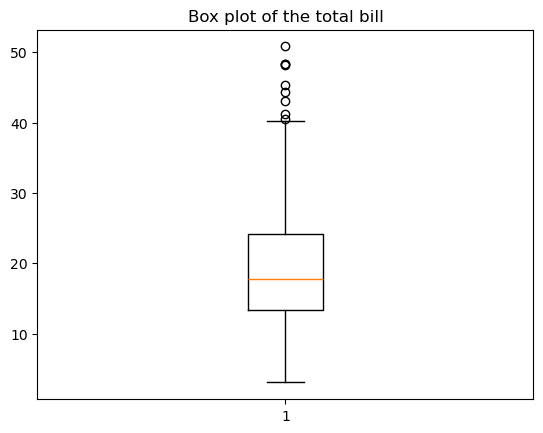

In [10]:
# with matplotlib
plt.boxplot(tips_data["total_bill"])
plt.title("Box plot of the total bill")
plt.show()

## Pandas DataFrame manipulation


Pandas is a library for storing and manipulating datasets. Here we provide a brief illustration of Pandas.

First, we use Pandas to read a text/csv file into a dataframe that is stored in your computer's memory.


In [12]:
df = pd.read_csv("nhanes_2015_2016.csv")

We can display the first few rows of data:


In [13]:
# look at top 3 rows
df.head(3)

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0


We can select a column by name and display its first few values:


In [14]:
df["SEQN"].head()

0    83732
1    83733
2    83734
3    83735
4    83736
Name: SEQN, dtype: int64

We can select limited ranges of rows and columns based on the row and column index labels, and display the result:


In [15]:
df.loc[[0, 1], ["SEQN", "RIAGENDR"]]

,SEQN,RIAGENDR
0,83732,1
1,83733,1


We can select limited ranges of rows and columns based on the row and column positions (counting from zero), and display the result:


In [16]:
df.iloc[[1, 2], [0, 5]]

,SEQN,RIAGENDR
1,83733,1
2,83734,1


## Randomness and reproducibility

Some procedures for analyzing data involve generating random values. Also, we frequently simulate random data in order to test the performance of methods for analyzing data.

When a computer generates random data, the data are actually "pseudo-random". We will not explain this in detail here, but essentially it means that the values are actually deterministic (the opposite of random), but appear random for most purposes. By setting the _seed_ of the pseudo-random number generator, the random values subsequently obtained will always be the same.

Sometimes it is useful to set the seed explicitly, so that the results of your code are reproducible. For example, below we show that once we set the seed (to 123) the first two random numbers generated (here from a normal distribution) are always the same.


In [19]:
np.random.seed(123)
print(np.random.normal())
print(np.random.normal())

-1.0856306033005612
0.9973454465835858


In [20]:
np.random.seed(123)
print(np.random.normal())
print(np.random.normal())

-1.0856306033005612
0.9973454465835858


If we continue generating random values without setting the seed, we will get more random values that behave as if they were independent samples from a standard normal distribution.


In [27]:
print(np.random.normal())
print(np.random.normal())

-0.44398195964606546
-0.43435127561851733


## Vectorization and list comprehension

Numpy and Pandas make heavy use of vectorization. This means that these libraries prefer to operate on collections of values rather than on single values. The most commonly encountered such collections are numpy _ndarrays_ (n-dimensional arrays whose elements are all of the same type) and Pandas _dataframes_ (a 2-dimensional array whose columns may have different types, while the rows within a column have the same type).

For example, in the following cell we use Numpy to generate sequences of numeric values (_vectors_):


In [28]:
x = np.random.normal(size=5)
y = np.linspace(0, 1, 5)
z = np.arange(5)

We can now operate on these vectors using "point-wise" arithmetic:


In [29]:
a = x - y
b = y * z
c = z / (1 + z)

Python has its own vector-like container called a _list_. Examples of creating such lists are:


In [30]:
x = [1, 2, 3]
y = ["a", "b", "c"]

Python lists cannot normally be used interchangeably with numpy or Pandas data structures.


List comprehensions allow you to easy create lists. They follow the format:

```
my_list = [expression(i) for i in input list]
```

For example, suppose you want to plot the sine curve from -$\pi$ to $\pi$. First we generate a grid of numeric values within the desired range:


In [31]:
x = np.linspace(-np.pi, np.pi, 20)
x

array([-3.14159265, -2.81089869, -2.48020473, -2.14951076, -1.8188168 ,
       -1.48812284, -1.15742887, -0.82673491, -0.49604095, -0.16534698,
        0.16534698,  0.49604095,  0.82673491,  1.15742887,  1.48812284,
        1.8188168 ,  2.14951076,  2.48020473,  2.81089869,  3.14159265])

Now we have two options. One is to exploit the Numpy's vectorization:


In [32]:
y1 = np.sin(x)

Another option is to use a list comprehension:


In [33]:
y2 = [np.sin(value) for value in x]

In this case, either approach can be used to create the plot:


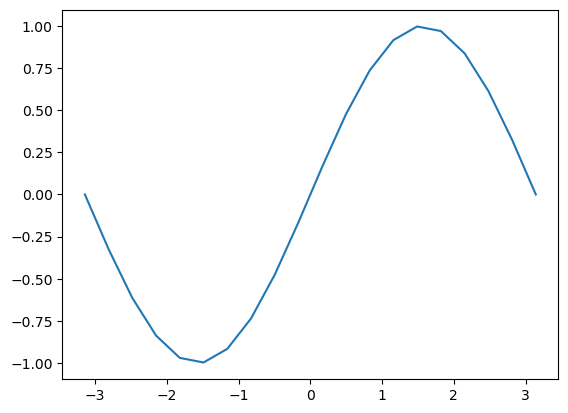

In [34]:
plt.plot(x, y1)
plt.show()

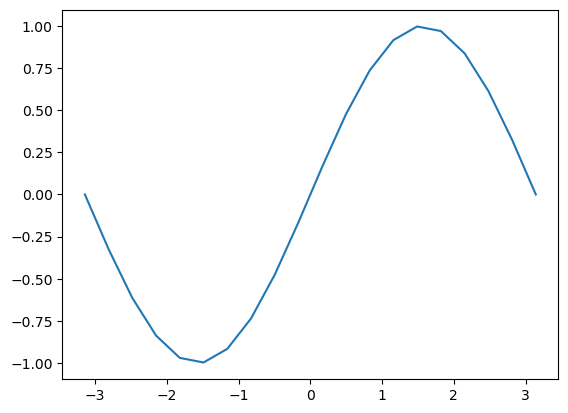

In [35]:
plt.plot(x, y2)
plt.show()